#Predictive Modelling - Rain prediction using Logistic Regression

The data set is taken from kaggle.
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [ ]:
#reading the dataset
df=pd.read_csv('weatherAUS.csv')

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#data Preprocessing
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info() #gives information about the various datatypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#descriptive statistics
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.describe(include=object)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-01-29,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
#we already know that there are 16 numerical and 7 categorical values
#we will now try to find there names
cate_features=[column_name for column_name in df.columns if df[column_name].dtype=='O']

In [ ]:
cate_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
#numerical features
num_features=[column_name for column_name in df.columns if df[column_name].dtype!='O']

In [ ]:
num_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
#the date feature has a large cardinality , it does not add any value to the model
#we will do feature engineering to decrease high cardinality
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
#we will now drop the date column
df.drop('Date',axis=1,inplace=True)


In [ ]:
cate_features=[column_name for column_name in df.columns if df[column_name].dtype=='O']
cat_feature_count_dict={}
for i in cate_features:
  cat_feature_count_dict[i]=df[i].nunique()
print(cat_feature_count_dict)

{'Location': 49, 'WindGustDir': 16, 'WindDir9am': 16, 'WindDir3pm': 16, 'RainToday': 2, 'RainTomorrow': 2}


In [ ]:
num_feature_count_dict={}
for i in num_features:
  num_feature_count_dict[i]=df[i].nunique()
print(num_feature_count_dict)

{'MinTemp': 389, 'MaxTemp': 505, 'Rainfall': 681, 'Evaporation': 358, 'Sunshine': 145, 'WindGustSpeed': 67, 'WindSpeed9am': 43, 'WindSpeed3pm': 44, 'Humidity9am': 101, 'Humidity3pm': 101, 'Pressure9am': 546, 'Pressure3pm': 549, 'Cloud9am': 10, 'Cloud3pm': 10, 'Temp9am': 441, 'Temp3pm': 502}


#Handling missing values

In [ ]:
#finding the missing value count for the categorical features
df[cate_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
#storing the categorical features with null values
null_cate_features=[column_name for column_name in cate_features if df[column_name].isnull().sum()]
print(null_cate_features)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#finding the missing value count for the numerical features
df[num_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
#storing the categorical features with null values
null_num_features=[column_name for column_name in num_features if df[column_name].isnull().sum()]
print(null_num_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#we will fill the categorical missing values with the mode
#and the numerical missing values with the mean
for i in null_cate_features:
  mode_Val=df[i].mode()[0]
  df[i].fillna(mode_Val,inplace=True)


 We will now fill the numerical missing values with the mean. But numerical features often habve outliers that impact the mean value. So we will first handle the outliers and then find the mean value.

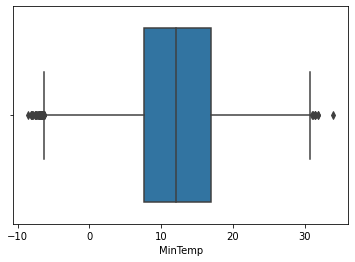

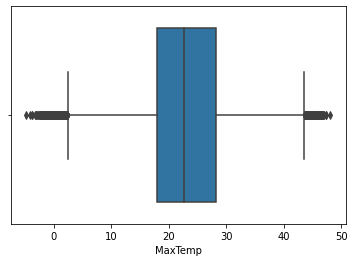

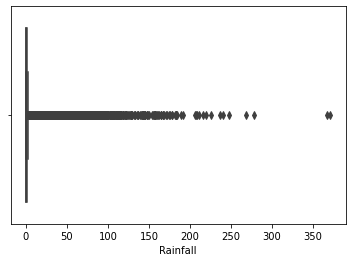

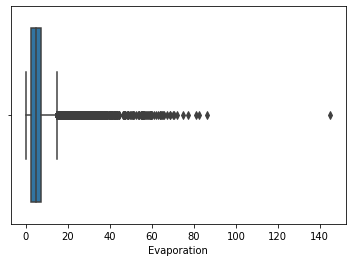

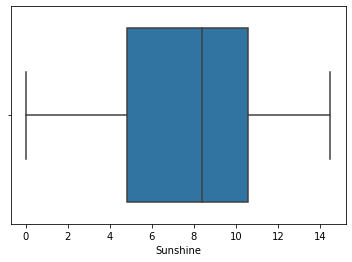

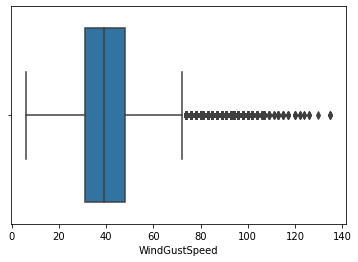

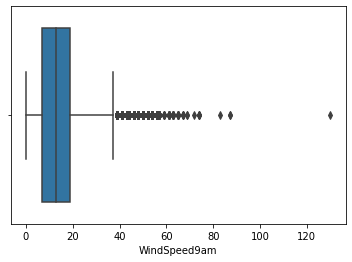

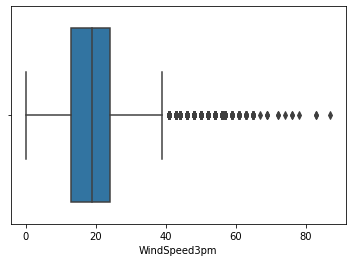

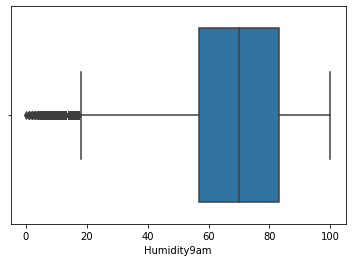

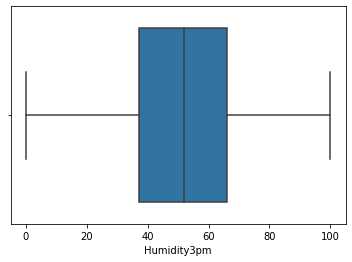

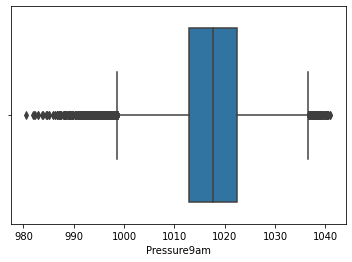

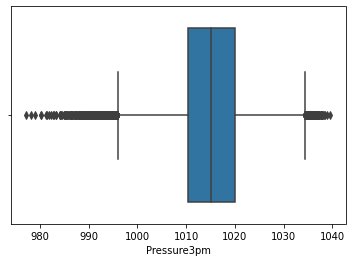

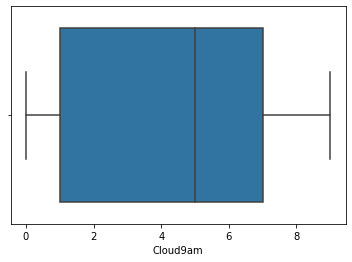

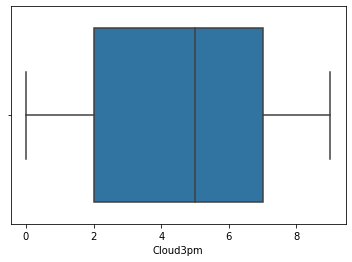

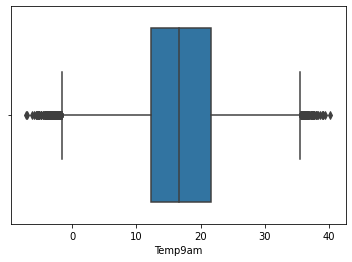

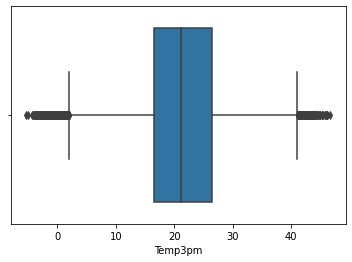

In [ ]:
for i in null_num_features:
  sns.boxplot(x=i,data=df)
  plt.show()

Well, as you might have guessed, the number (here 1.5, hereinafter scale) clearly controls the sensitivity of the range and hence the decision rule. A bigger scale would make the outlier(s) to be considered as data point(s) while a smaller one would make some of the data point(s) to be perceived as outlier(s). And we’re quite sure, none of these cases is desirable.

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
 These are the features with ouliers

In [ ]:
features_with_outliers=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for i in features_with_outliers:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  IQR=q3-q1
  lower_limit= q1-(IQR*1.5)
  upper_limit= q3+(IQR*1.5)
  df.loc[df[i]<lower_limit,i]=lower_limit
  df.loc[df[i]>upper_limit,i]=upper_limit
  

Now that we have treated the outliers , we will now treat the missing values


In [ ]:
for i in null_num_features:
  mean_val= df[i].mean()
  df[i].fillna(mean_val, inplace=True)

In [ ]:
df[null_num_features].isnull().sum() #see , no more null values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Now comes the most important task. EDA-Exploratory data analysis

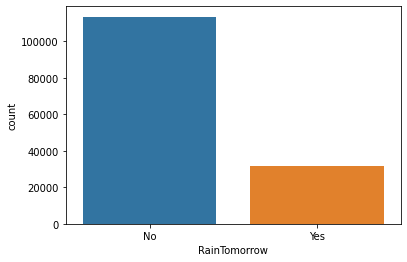

In [ ]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


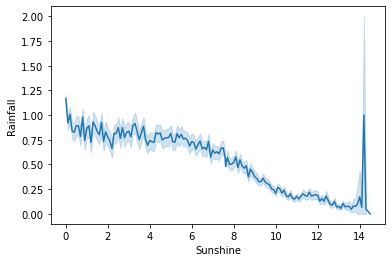

In [ ]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall')
plt.show()

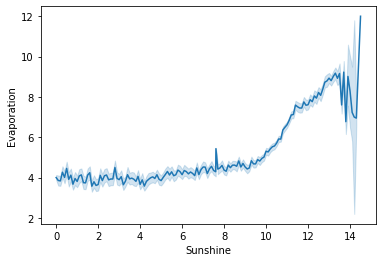

In [ ]:
sns.lineplot(x='Sunshine',y='Evaporation',data=df)
plt.show()

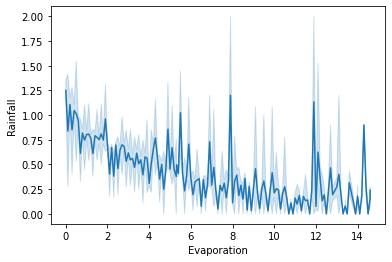

In [ ]:
sns.lineplot(x='Evaporation',y='Rainfall',data=df)
plt.show()


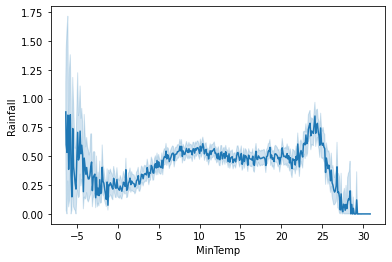

In [ ]:
sns.lineplot(x='MinTemp',y='Rainfall',data=df)
plt.show()

#FEATURE ENCODING:
The categorical data can not be handled by most of the machine learning algorithms. Hence they need to be converted to numerical data.
This is called feature encoding

In [ ]:
def encode_categorical_features(feature_name):
  mapped_values={}
  li= list(df[feature_name].unique())
  for i in range(0,len(li)):
    mapped_values[li[i]]=i
  return mapped_values
for i in cate_features:
  df[i].replace(encode_categorical_features(i),inplace=True)


In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


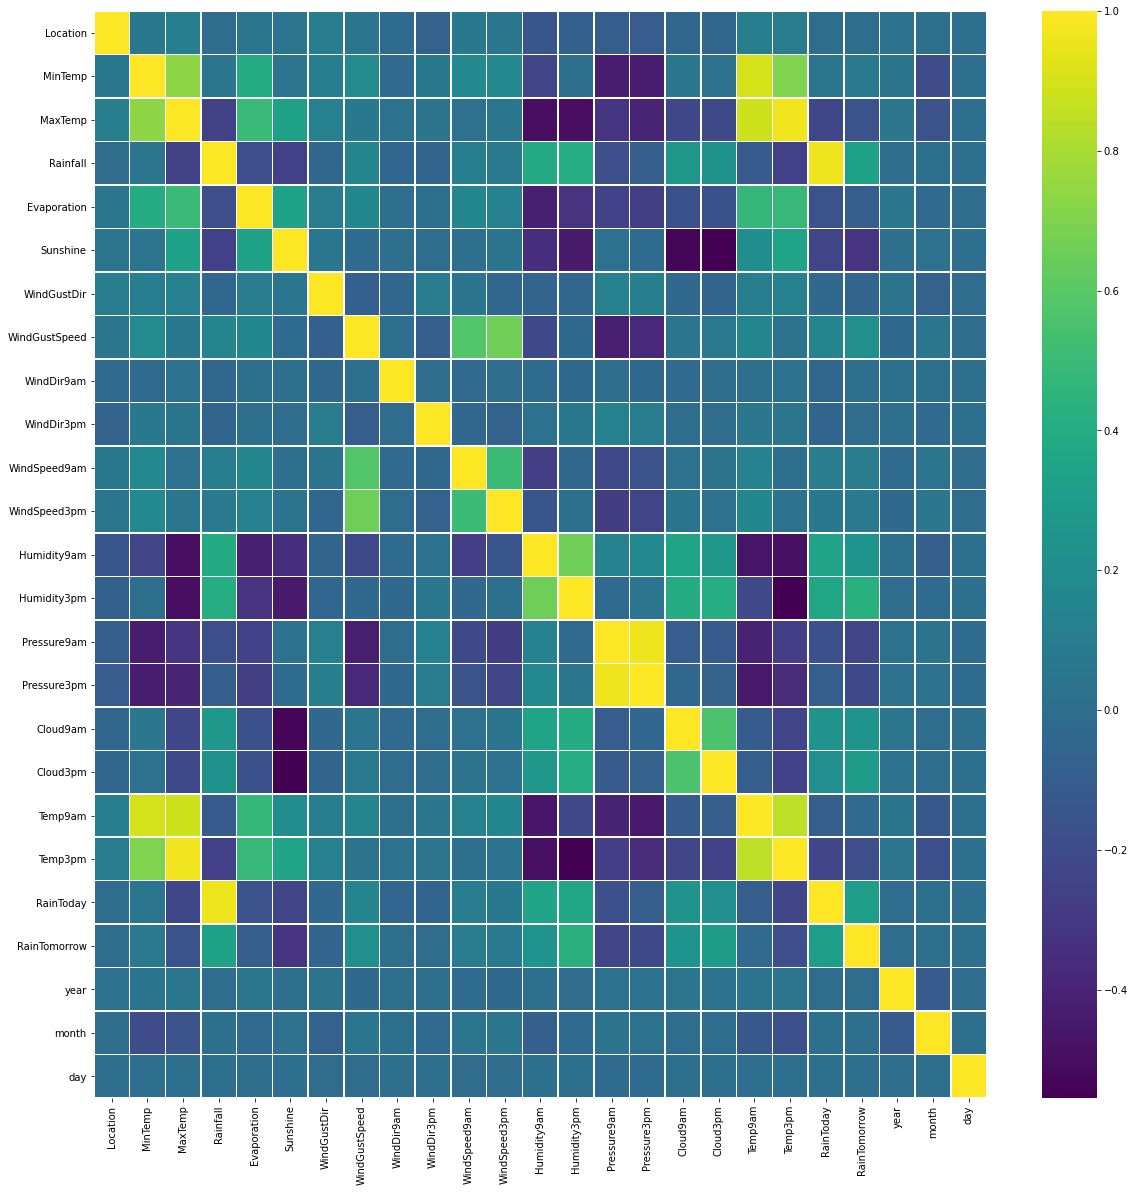

In [ ]:
#to find the correlation we will use the heatmaps
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidth=0.5,annot=False,fmt='.2f',cmap='viridis')
plt.show()

In [ ]:
#splitting the independent features and the target features
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

#Feature Importance:
Machine Learning Model performance depends on features that are used to train a model. Feature importance describes which features are relevant to build a model.
Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are at predicting a target variable. Feature importance helps in Feature Selection.

```

```



In [ ]:
from sklearn.ensemble import ExtraTreesRegressor 
etr=ExtraTreesRegressor()
etr.fit(X,y)
etr.feature_importances_


array([0.0347239 , 0.03008987, 0.02883827, 0.03481605, 0.02335303,
       0.04461157, 0.02981347, 0.05718057, 0.03045088, 0.0315915 ,
       0.03116495, 0.03246524, 0.03669302, 0.20366084, 0.03641166,
       0.05034943, 0.02401122, 0.03394198, 0.02803196, 0.02819358,
       0.05582235, 0.03089464, 0.03036019, 0.03252983])

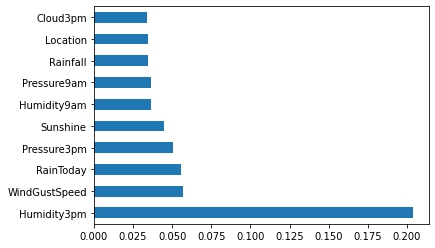

In [ ]:
#visualising the  feature importance
visualise=pd.Series(etr.feature_importances_,index=X.columns)
visualise.nlargest(10).plot(kind='barh')

#SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=True)


#Feature scaling:
It is anothetr important part of bulding any model. We will use standard scaler to do feature scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)


In [ ]:
X_test=sc.transform(X_test)

#Building the model
We will use logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
#We will now evaluate the model accuracy using accuracy_score()
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.8444933315000688


In the above model  the accuracy score is not great. So we will try to improve our model using cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(lr_model,X_train,y_train,cv=5,scoring='accuracy')
print(score)
print('Average cross val score is {}'.format(score.mean()))

[0.84343044 0.84669588 0.84712555 0.83611911 0.84445495]
Average cross val score is 0.8435651849622392


In the above cross val score the mean value is pretty much closer to the actual model accuracy. Hence, cross validating did not benifit a lot.